# Distribution of PC1 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
df_life = pd.read_csv('data/lifehistory_df.csv')
df_habitat = pd.read_csv('data/habitatdf.csv')
df_food = pd.read_csv('data/fooddf.csv')
df_species = pd.read_csv('data/species.csv')
dfbasiceco = pd.read_csv('data/basicecodf.csv')

#PCA

features = df_life[['am', 'Wwi', 'Ri', 'Wwb', 'Li', 'ab']]

X = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['species'] = df_life['species']
df_pca['habitat'] = df_habitat['adult']
df_pca['food'] = df_food['adult']
df_pca['class'] = df_species['Class']
df_pca['phylum'] = df_species['Phylum']
df_pca['embryo'] = dfbasiceco['embryo']

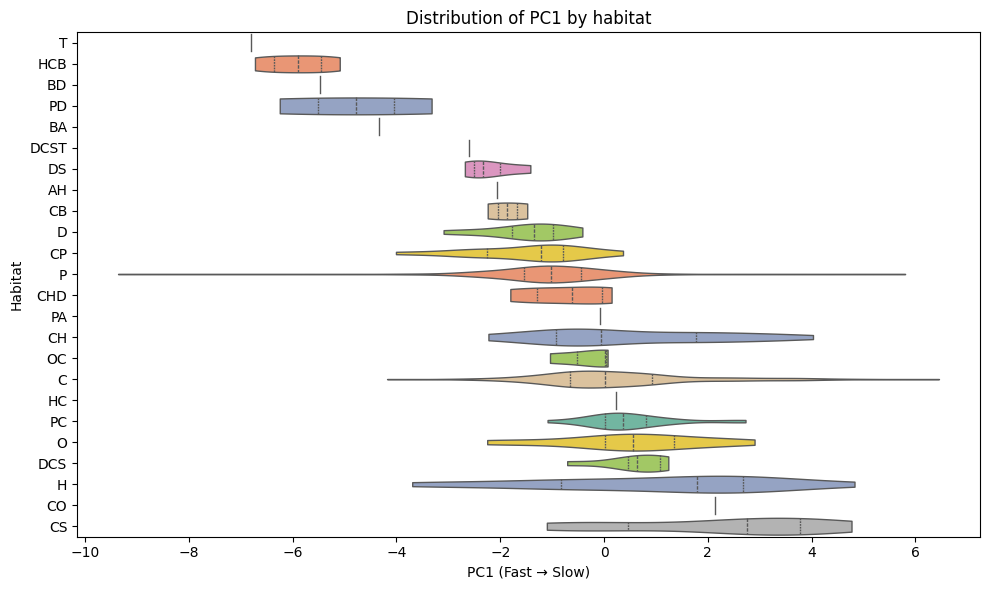

In [3]:

habitat_order = (
    df_pca.groupby("food")["PC1"]
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df_pca,
    y='food',
    x='PC1',
    order=habitat_order,     
    density_norm='width',
    inner='quartile',        
    hue="food",
    palette='Set2',
    cut=0,
    linewidth=1,
    legend=False
)

plt.title("Distribution of PC1 by habitat")
plt.xlabel("PC1 (Fast → Slow)")
plt.ylabel("Habitat")
plt.tight_layout()
plt.show()


In [6]:
# ploting with plotly

fig = px.violin(
    df_pca,
    y="habitat",      
    x="PC1",          
    color="habitat",  
    #box=True,         
    points="all",     
    orientation="h",  
    color_discrete_sequence=px.colors.qualitative.Set2,
)

fig.update_layout(
    title="Distribution of PC1 by habitat",
    xaxis_title="PC1 (fast -> slow)",
    yaxis_title="Habitat",
    height=600
)

fig.show()
fig.write_html("figures/distribution_habitat.html")


In [7]:
fig = px.violin(
    df_pca,
    y="embryo",      
    x="PC1",          
    color="embryo",  
    box=True,         
    points="all",     
    orientation="h",  
    color_discrete_sequence=px.colors.qualitative.Set2,
)

fig.update_layout(
    title="Distribution of PC1 by embryo",
    xaxis_title="PC1 (fast -> slow)",
    yaxis_title="Embryo",
    height=600
)

fig.show()
fig.write_html("figures/distribution_embryo.html")